# Dataset Information

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Item 5_Answers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   filename              50 non-null     object
 1   True Initial Fee      50 non-null     object
 2   Alternative Answer    26 non-null     object
 3   Alternative Answer.1  13 non-null     object
 4   Alternative Answer.2  6 non-null      object
 5   Alternative Answer.3  3 non-null      object
 6   Alternative Answer.4  2 non-null      object
dtypes: object(7)
memory usage: 2.9+ KB


# World Cloud Visualizations

## Bag of Words (BoW)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from google.colab import files

# Upload file manually in Google Colab
uploaded = files.upload()

# Extract filename from uploaded files
txt_filename = list(uploaded.keys())[0]

# Read text file
with open(txt_filename, 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocessing: Converting text into a list for analysis
documents = [text]





# Topic Modeling (LDA)
lda_vectorizer = CountVectorizer(stop_words='english')
lda_matrix = lda_vectorizer.fit_transform(documents)

lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(lda_matrix)

# Display Topics
topics = {}
feature_names = lda_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-6:-1]]

# Convert topics to DataFrame for better visualization
topics_df = pd.DataFrame.from_dict(topics, orient='index', columns=[f"Word {i+1}" for i in range(5)])

# Display the topics
topics_df


Saving 6 Chick-fil-A.pdf-all_items_item_5.txt to 6 Chick-fil-A.pdf-all_items_item_5 (3).txt


,Word 1,Word 2,Word 3,Word 4,Word 5
Topic 1,fil,chick,distributor,supply,cfa
Topic 2,used,cost,lemonade,lemon,juice
Topic 3,used,cost,lemonade,lemon,juice


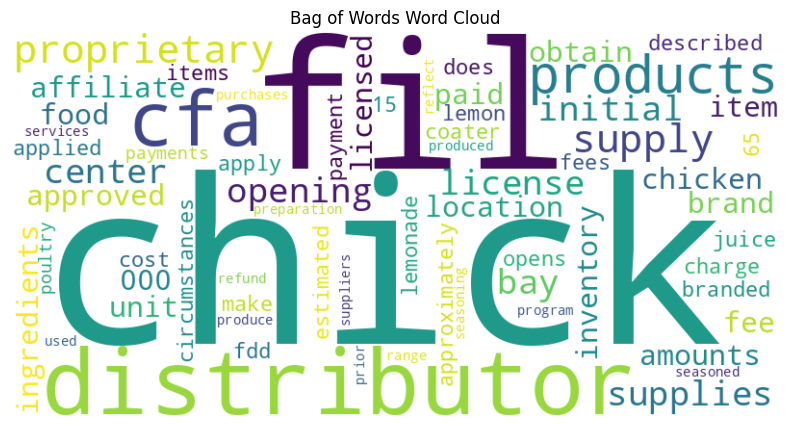

In [ ]:

# Word Cloud (Bag of Words)
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(documents)
bow_counts = dict(zip(bow_vectorizer.get_feature_names_out(), bow_matrix.toarray().sum(axis=0)))

wordcloud_bow = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bow_counts)

# Display Word Cloud (BoW)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bow, interpolation="bilinear")
plt.axis("off")
plt.title("Bag of Words Word Cloud")
plt.show()


## N-Gram

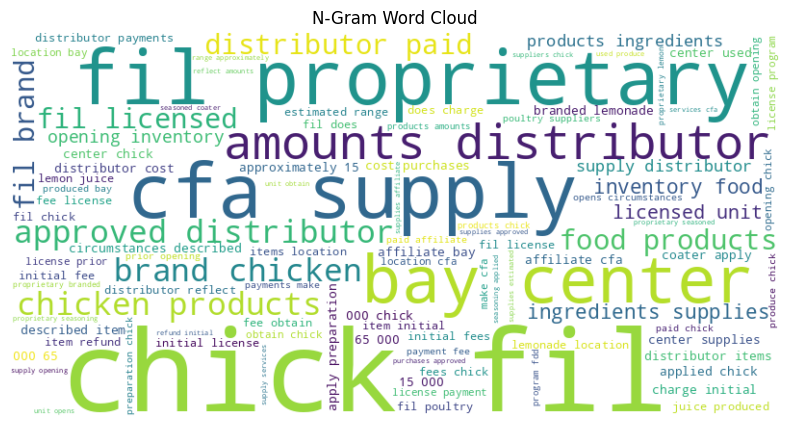

In [ ]:
# Word Cloud (N-Gram)
n_gram_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
n_gram_matrix = n_gram_vectorizer.fit_transform(documents)
n_gram_counts = dict(zip(n_gram_vectorizer.get_feature_names_out(), n_gram_matrix.toarray().sum(axis=0)))

wordcloud_ngram = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_gram_counts)

# Display Word Cloud (N-Gram)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ngram, interpolation="bilinear")
plt.axis("off")
plt.title("N-Gram Word Cloud")
plt.show()

## Term Frequency-Inverse Document Frequency (TF-IDF)

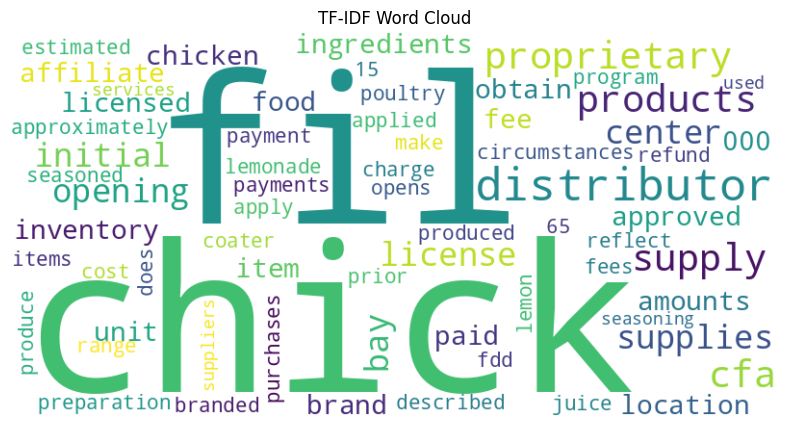

In [ ]:
# Word Cloud (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.toarray().sum(axis=0)))

wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

# Display Word Cloud (TF-IDF)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Word Cloud")
plt.show()